In [17]:
import pandas as pd
import tweepy
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re


# Getting preprocessed data for CNN from CSV file

In [18]:
np.random.seed(500)
preprocessedData_CNN = pd.read_csv('preprocessed_nov_23_df_cnn_topic_combined.csv',delimiter=',',encoding='latin-1')
preprocessedData_CNN.head()


Unnamed: 0.2  Unnamed: 0.1 screenName  \
0             0             0        CNN   
1             1             1        CNN   
2             2             2        CNN   
3             3             3        CNN   
4             4             4        CNN   

                                         description  location  \
0  Itâs our job to #GoThere & tell the most dif...       NaN   
1  Itâs our job to #GoThere & tell the most dif...       NaN   
2  Itâs our job to #GoThere & tell the most dif...       NaN   
3  Itâs our job to #GoThere & tell the most dif...       NaN   
4  Itâs our job to #GoThere & tell the most dif...       NaN   

                                                text  Unnamed: 0  \
0  another employee exodus appears underway twitt...        31.0   
1  amazon ceo andy jassy said job cuts the e-comm...        36.0   
2  max verstappen and red bull have hit out onlin...        37.0   
3  here are things you need know today new york s...        45.0   
4  riptwitter was the top trend worldwide thursda...        53.0   

           topic  topicEncoded  \
0  corporatenews             0   
1  corporatenews             0   
2  corporatenews             0   
3  corporatenews             0   
4  corporatenews             0   

                                 tokenized_sentences  \
0  ['anoth', 'employe', 'exodu', 'appear', 'under...   
1  ['amazon', 'ceo', 'andi', 'jassi', 'said', 'jo...   
2  ['max', 'verstappen', 'red', 'bull', 'hit', 'o...   
3  ['thing', 'need', 'know', 'today', 'new', 'yor...   
4  ['riptwitt', 'top', 'trend', 'worldwid', 'thur...   

                                          clean_text  
0  anoth employe exodu appear underway twitter ma...  
1  amazon ceo andi jassi said job cut e-commerc g...  
2  max verstappen red bull hit onlin threat abus ...  
3  thing need know today new york snowstorm twitt...  
4  riptwitt top trend worldwid thursday even user...

# Getting preprocessed data for FOX from CSV file

In [19]:
np.random.seed(500)
preprocessedData_Fox = pd.read_csv('preprocessed_nov_23_df_fox_topic_combined.csv',delimiter=',',encoding='latin-1')
preprocessedData_Fox.head()


Unnamed: 0.2  Unnamed: 0.1 screenName  \
0             0             0    FoxNews   
1             1             1    FoxNews   
2             2             2    FoxNews   
3             3             3    FoxNews   
4             4             4    FoxNews   

                                         description location  \
0  Follow America's #1 cable news network, delive...   U.S.A.   
1  Follow America's #1 cable news network, delive...   U.S.A.   
2  Follow America's #1 cable news network, delive...   U.S.A.   
3  Follow America's #1 cable news network, delive...   U.S.A.   
4  Follow America's #1 cable news network, delive...   U.S.A.   

                                                text  Unnamed: 0  \
0  elon musk triggers liberals with ultimatum twi...        10.0   
1  musk trolls aoc, liberal journalists who panic...        20.0   
2  twitter reportedly losing more staff members a...        52.0   
3  sen markey warns elon musk will pay price new ...        63.0   
4  surge twitter fact-checks progressive figures ...        81.0   

           topic  topicEncoded  \
0  corporatenews             0   
1  corporatenews             0   
2  corporatenews             0   
3  corporatenews             0   
4  corporatenews             0   

                                 tokenized_sentences  \
0  ['elon', 'musk', 'trigger', 'liber', 'ultimatu...   
1  ['musk', 'troll', 'aoc', ',', 'liber', 'journa...   
2  ['twitter', 'reportedli', 'lose', 'staff', 'me...   
3  ['sen', 'markey', 'warn', 'elon', 'musk', 'pay...   
4  ['surg', 'twitter', 'fact-check', 'progress', ...   

                                          clean_text  
0  elon musk trigger liber ultimatum twitter staf...  
1  musk troll aoc , liber journalist panick end t...  
2  twitter reportedli lose staff member musk hard...  
3  sen markey warn elon musk pay price new twitte...  
4  surg twitter fact-check progress figur draw pr...

# Getting preprocessed data for REUTERS from CSV file

In [20]:
np.random.seed(500)
preprocessedData_Reuters = pd.read_csv('preprocessed_nov_23_df_reuters_topic_combined.csv',delimiter=',',encoding='latin-1')
preprocessedData_Reuters.head()

Unnamed: 0.2  Unnamed: 0.1 screenName  \
0             0             0    Reuters   
1             1             1    Reuters   
2             2             2    Reuters   
3             3             3    Reuters   
4             4             4    Reuters   

                                         description          location  \
0  Top and breaking news, pictures and videos fro...  Around the world   
1  Top and breaking news, pictures and videos fro...  Around the world   
2  Top and breaking news, pictures and videos fro...  Around the world   
3  Top and breaking news, pictures and videos fro...  Around the world   
4  Top and breaking news, pictures and videos fro...  Around the world   

                                                text  Unnamed: 0  \
0  italy court rejects googles appeal against wat...         0.0   
1  jaguar land rover turns laid-off tech workers ...         4.0   
2  indian food delivery firm zomatos co-founder r...        12.0   
3  companies are setting minimum prices their goo...        16.0   
4  twitter has reinstated the accounts us comedia...        17.0   

           topic  topicEncoded  \
0  corporatenews             0   
1  corporatenews             0   
2  corporatenews             0   
3  corporatenews             0   
4  corporatenews             0   

                                 tokenized_sentences  \
0  ['itali', 'court', 'reject', 'googl', 'appeal'...   
1  ['jaguar', 'land', 'rover', 'turn', 'laid-off'...   
2  ['indian', 'food', 'deliveri', 'firm', 'zomato...   
3  ['compani', 'set', 'minimum', 'price', 'good',...   
4  ['twitter', 'reinstat', 'account', 'u', 'comed...   

                                          clean_text  
0  itali court reject googl appeal watchdog fine ...  
1  jaguar land rover turn laid-off tech worker sk...  
2  indian food deliveri firm zomato co-found resi...  
3  compani set minimum price good maintain profit...  
4  twitter reinstat account u comedian kathi grif...

# Remove hyperlinks from preprocessed data

In [23]:
def remove_hyperlinks(data_frame):
    data_frame['clean_text_final'] = data_frame['clean_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [25]:
remove_hyperlinks(preprocessedData_CNN)
remove_hyperlinks(preprocessedData_Fox)
remove_hyperlinks(preprocessedData_Reuters)

In [26]:
preprocessedData_CNN

Unnamed: 0.2  Unnamed: 0.1 screenName  \
0                0             0        CNN   
1                1             1        CNN   
2                2             2        CNN   
3                3             3        CNN   
4                4             4        CNN   
...            ...           ...        ...   
1512          1512          1512        CNN   
1513          1513          1513        CNN   
1514          1514          1514        CNN   
1515          1515          1515        CNN   
1516          1516          1516        CNN   

                                            description  location  \
0     Itâs our job to #GoThere & tell the most dif...       NaN   
1     Itâs our job to #GoThere & tell the most dif...       NaN   
2     Itâs our job to #GoThere & tell the most dif...       NaN   
3     Itâs our job to #GoThere & tell the most dif...       NaN   
4     Itâs our job to #GoThere & tell the most dif...       NaN   
...                                                 ...       ...   
1512  Itâs our job to #GoThere & tell the most dif...       NaN   
1513  Itâs our job to #GoThere & tell the most dif...       NaN   
1514  Itâs our job to #GoThere & tell the most dif...       NaN   
1515  Itâs our job to #GoThere & tell the most dif...       NaN   
1516  Itâs our job to #GoThere & tell the most dif...       NaN   

                                                   text  Unnamed: 0  \
0     another employee exodus appears underway twitt...        31.0   
1     amazon ceo andy jassy said job cuts the e-comm...        36.0   
2     max verstappen and red bull have hit out onlin...        37.0   
3     here are things you need know today new york s...        45.0   
4     riptwitter was the top trend worldwide thursda...        53.0   
...                                                 ...         ...   
1512  the man who gunned down the houston areas belo...      3881.0   
1513  four takeaways from utahs only senate debate h...      3885.0   
1514  four takeaways from the georgia governors deba...      3886.0   
1515  ukraines president says  the countrys power st...      3887.0   
1516  republican operative was convicted thursday fa...     14710.0   

              topic  topicEncoded  \
0     corporatenews             0   
1     corporatenews             0   
2     corporatenews             0   
3     corporatenews             0   
4     corporatenews             0   
...             ...           ...   
1512       politics             3   
1513       politics             3   
1514       politics             3   
1515       politics             3   
1516       politics             3   

                                    tokenized_sentences  \
0     ['anoth', 'employe', 'exodu', 'appear', 'under...   
1     ['amazon', 'ceo', 'andi', 'jassi', 'said', 'jo...   
2     ['max', 'verstappen', 'red', 'bull', 'hit', 'o...   
3     ['thing', 'need', 'know', 'today', 'new', 'yor...   
4     ['riptwitt', 'top', 'trend', 'worldwid', 'thur...   
...                                                 ...   
1512  ['man', 'gun', 'houston', 'area', 'belov', 'fi...   
1513  ['four', 'takeaway', 'utah', 'senat', 'debat',...   
1514  ['four', 'takeaway', 'georgia', 'governor', 'd...   
1515  ['ukrain', 'presid', 'say', 'countri', 'power'...   
1516  ['republican', 'oper', 'convict', 'thursday', ...   

                                             clean_text  \
0     anoth employe exodu appear underway twitter ma...   
1     amazon ceo andi jassi said job cut e-commerc g...   
2     max verstappen red bull hit onlin threat abus ...   
3     thing need know today new york snowstorm twitt...   
4     riptwitt top trend worldwid thursday even user...   
...                                                 ...   
1512  man gun houston area belov first sikh sheriff ...   
1513  four takeaway utah senat debat httpstcozswblswvdj   
1514  four takeaway georgia governor debat httpstcop...   
1515  ukrain pr

In [27]:
sns.countplot(preprocessedData_CNN.topic)
plt.xlabel('Category')
plt.title('CountPlot')


/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CountPlot')

/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CountPlot')

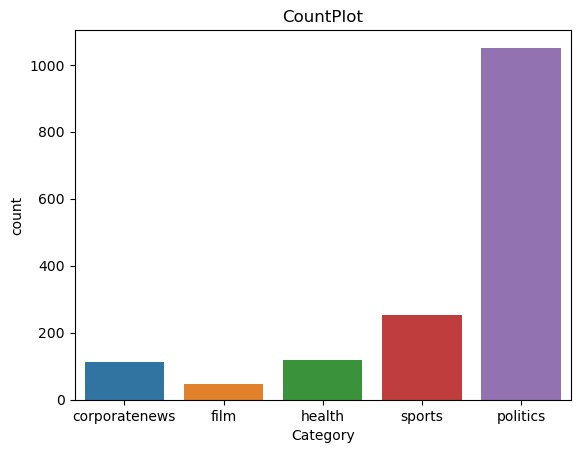

In [28]:
sns.countplot(preprocessedData_Fox.topic)
plt.xlabel('Category')
plt.title('CountPlot')


/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CountPlot')

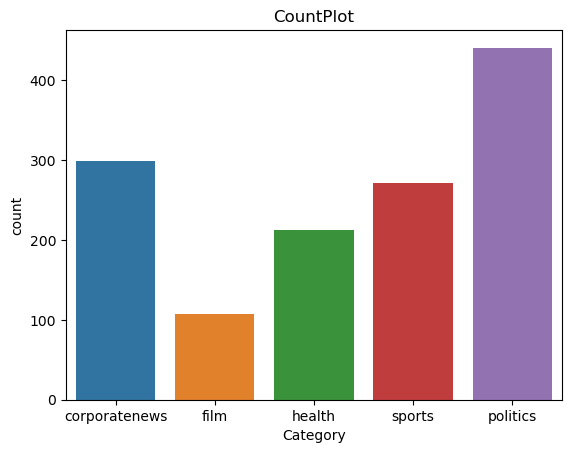

In [29]:
sns.countplot(preprocessedData_Reuters.topic)
plt.xlabel('Category')
plt.title('CountPlot')


# Training on CNN and testing on FOX and Reuters

In [43]:
Train_X_CNN, Train_Y_CNN = preprocessedData_CNN['clean_text_final'], preprocessedData_CNN['topicEncoded']
Test_X_FOX, Test_Y_FOX = preprocessedData_Fox['clean_text_final'], preprocessedData_Fox['topicEncoded']
Test_X_Reuters, Test_Y_Reuters = preprocessedData_Reuters['clean_text_final'], preprocessedData_Reuters['topicEncoded']

# Testing with FOX News

In [52]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(preprocessedData_CNN['clean_text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X_CNN)
Test_X_Tfidf = Tfidf_vect.transform(Test_X_FOX)

# print(Tfidf_vect.vocabulary_)

In [53]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y_CNN)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_FOX)*100)

SVM Accuracy Score ->  87.75252525252525


In [54]:
print(classification_report(Test_Y_FOX,predictions_SVM))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       114
           1       0.97      0.58      0.73        48
           2       0.99      0.63      0.77       118
           3       0.86      0.99      0.92      1051
           4       0.94      0.63      0.76       253

    accuracy                           0.88      1584
   macro avg       0.93      0.72      0.80      1584
weighted avg       0.89      0.88      0.87      1584



# Testing with Reuters NEWS

In [47]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(preprocessedData_CNN['clean_text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X_CNN)
Test_X_Tfidf = Tfidf_vect.transform(Test_X_Reuters)

# print(Tfidf_vect.vocabulary_)

In [48]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y_CNN)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_Reuters)*100)

SVM Accuracy Score ->  75.22522522522522


In [50]:
print(classification_report(Test_Y_Reuters,predictions_SVM))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       299
           1       0.85      0.63      0.72       107
           2       0.96      0.42      0.59       213
           3       0.61      0.97      0.75       441
           4       0.94      0.69      0.79       272

    accuracy                           0.75      1332
   macro avg       0.85      0.70      0.74      1332
weighted avg       0.82      0.75      0.75      1332



# Training on FOX and testing on CNN and Reuters

In [51]:
Train_X_FOX, Train_Y_FOX = preprocessedData_Fox['clean_text_final'], preprocessedData_Fox['topicEncoded']
Test_X_CNN, Test_Y_CNN = preprocessedData_CNN['clean_text_final'], preprocessedData_CNN['topicEncoded']
Test_X_Reuters, Test_Y_Reuters = preprocessedData_Reuters['clean_text_final'], preprocessedData_Reuters['topicEncoded']

# Testing with CNN News

In [55]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(preprocessedData_Fox['clean_text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X_FOX)
Test_X_Tfidf = Tfidf_vect.transform(Test_X_CNN)

# print(Tfidf_vect.vocabulary_)

In [57]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y_FOX)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_CNN)*100)

SVM Accuracy Score ->  78.04878048780488


In [58]:
print(classification_report(Test_Y_CNN,predictions_SVM))

              precision    recall  f1-score   support

           0       0.97      0.49      0.66       237
           1       0.93      0.35      0.50       113
           2       0.96      0.56      0.71       151
           3       0.73      0.98      0.84       832
           4       0.83      0.70      0.76       184

    accuracy                           0.78      1517
   macro avg       0.88      0.62      0.69      1517
weighted avg       0.82      0.78      0.76      1517



# Testing with Reuters News

In [59]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(preprocessedData_Fox['clean_text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X_FOX)
Test_X_Tfidf = Tfidf_vect.transform(Test_X_Reuters)

# print(Tfidf_vect.vocabulary_)

In [60]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y_FOX)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_Reuters)*100)

SVM Accuracy Score ->  70.94594594594594


In [62]:
print(classification_report(Test_Y_Reuters,predictions_SVM))

              precision    recall  f1-score   support

           0       0.97      0.46      0.62       299
           1       0.94      0.42      0.58       107
           2       0.99      0.52      0.68       213
           3       0.55      0.98      0.71       441
           4       0.89      0.80      0.84       272

    accuracy                           0.71      1332
   macro avg       0.87      0.64      0.69      1332
weighted avg       0.82      0.71      0.70      1332



# Training on Reuters and testing on CNN and FOX

In [63]:
Train_X_Reuters, Train_Y_Reuters = preprocessedData_Reuters['clean_text_final'], preprocessedData_Reuters['topicEncoded']
Test_X_CNN, Test_Y_CNN = preprocessedData_CNN['clean_text_final'], preprocessedData_CNN['topicEncoded']
Test_X_FOX, Test_Y_FOX = preprocessedData_Fox['clean_text_final'], preprocessedData_Fox['topicEncoded']


# Testing with CNN News

In [64]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(preprocessedData_Reuters['clean_text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X_Reuters)
Test_X_Tfidf = Tfidf_vect.transform(Test_X_CNN)

# print(Tfidf_vect.vocabulary_)

In [65]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y_Reuters)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_CNN)*100)

SVM Accuracy Score ->  82.00395517468688


In [66]:
print(classification_report(Test_Y_CNN,predictions_SVM))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       237
           1       0.94      0.54      0.69       113
           2       0.68      0.60      0.64       151
           3       0.83      0.98      0.90       832
           4       0.86      0.45      0.59       184

    accuracy                           0.82      1517
   macro avg       0.82      0.68      0.72      1517
weighted avg       0.82      0.82      0.81      1517



# Testing with FOX News

In [67]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(preprocessedData_Reuters['clean_text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X_Reuters)
Test_X_Tfidf = Tfidf_vect.transform(Test_X_FOX)

# print(Tfidf_vect.vocabulary_)

In [68]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y_Reuters)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_FOX)*100)

SVM Accuracy Score ->  83.77525252525253


In [69]:
print(classification_report(Test_Y_FOX,predictions_SVM))

              precision    recall  f1-score   support

           0       0.81      0.73      0.76       114
           1       1.00      0.44      0.61        48
           2       0.67      0.60      0.63       118
           3       0.85      0.98      0.91      1051
           4       0.89      0.49      0.63       253

    accuracy                           0.84      1584
   macro avg       0.84      0.65      0.71      1584
weighted avg       0.84      0.84      0.82      1584



# Testing with Reuters News

In [81]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(preprocessedData_Reuters['clean_text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X_Reuters)
Test_X_Tfidf = Tfidf_vect.transform(Train_X_Reuters)

# print(Tfidf_vect.vocabulary_)

In [82]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y_Reuters)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Train_Y_Reuters)*100)

SVM Accuracy Score ->  99.47447447447448


In [83]:
print(classification_report(Train_Y_Reuters,predictions_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       0.98      0.99      0.99       107
           2       1.00      0.99      0.99       213
           3       1.00      1.00      1.00       441
           4       0.99      1.00      0.99       272

    accuracy                           0.99      1332
   macro avg       0.99      0.99      0.99      1332
weighted avg       0.99      0.99      0.99      1332

